# Download Imdb data from
 http://mng.bz/0tIo

let’s collect the individual training reviews into a list of strings, one string per
review. We’ll also collect the review labels (positive/negative) into a labels list. 

In [1]:
# Lets take a look at the downloaded dada

import os

print(os.listdir('aclImdb'))
print(os.listdir('aclImdb/train'))

['.DS_Store', 'test', 'train']
['.DS_Store', 'neg', 'pos', 'urls_neg.txt', 'urls_pos.txt']


In [2]:
# IMDB Dataset contain negative and positive reviews in text format 

In [3]:
f = open("aclImdb/train/pos/268_8.txt", "r")
print(f.read())

I loved Dedee Pfeiffer (is that spelled right?) in Cybil. Haven't seen her for awhile and forgot how much I missed her. I thought she did a great job in this. The supporting cast was pretty good too. In some angles, the daughter even looked like a young Nicole Kidman. The abductor was pretty creepy and the story generally had some good twists. The young boyfriend was a hottie. I thought the husband definitely had something to do with it for sure.<br /><br />Just got the Lifetime Movie Network for Christmas and am loving these movies. Kept my interest and I'll watch it again when they rerun it. Can anyone else recommend any similar movies to this? You can post on the board or send me a private email if you want. Thanks in advance. Aboutagirly.


In [4]:
f = open("aclImdb/train/neg/10002_1.txt", "r")
print(f.read())

Sorry everyone,,, I know this is supposed to be an "art" film,, but wow, they should have handed out guns at the screening so people could blow their brains out and not watch. Although the scene design and photographic direction was excellent, this story is too painful to watch. The absence of a sound track was brutal. The loooonnnnng shots were too long. How long can you watch two people just sitting there and talking? Especially when the dialogue is two people complaining. I really had a hard time just getting through this film. The performances were excellent, but how much of that dark, sombre, uninspired, stuff can you take? The only thing i liked was Maureen Stapleton and her red dress and dancing scene. Otherwise this was a ripoff of Bergman. And i'm no fan f his either. I think anyone who says they enjoyed 1 1/2 hours of this is,, well, lying.


# Processing the labels of the raw IMDB data

In [5]:
# With this entire code we just created labels for the neg and pos text

import os
imdb_dir = 'aclImdb'
train_dir = os.path.join(imdb_dir, 'train') #train_dir = aclImdb\train
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type) #dir_name = aclImdb\train\neg
                                                   #dir_name = aclImdb\train\pos
        
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':                  # if file is text file
            f = open(os.path.join(dir_name, fname),encoding="utf8") # open it
            texts.append(f.read())               # add in that empty texts list we made before
            f.close()
        if label_type == 'neg':                 # ager neg folder ka ho to 0 label
            labels.append(0)                    # aur labels list mai daldo jo upper bnaya tha
        else:
            labels.append(1)                   # pos hoto 1 label deke labels folder mai daldo

# Tokenizing the text of the raw IMDB data
we’ll add the following twist:
restricting the training data to the first 200 samples. So you’ll learn to classify movie
reviews after looking at just 200 examples.

In [6]:
maxlen = 100               # Cuts off reviews after 100 words
training_samples = 200     # Trains on 200 samples
validation_samples = 10000 # Validates on 10,000 samples
max_words = 10000          # Considers only the top 10,000 words in the dataset

In [7]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=max_words)    # max_words = 10000 
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [8]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
print()
#print(tokenizer.word_index)

Found 88582 unique tokens.



In [9]:
# pad_sequences is used to ensure that all sequences in a list have the same length.

from tensorflow.keras.preprocessing.sequence import pad_sequences
data = pad_sequences(sequences, maxlen=maxlen)                    # maxlen = 100   

In [10]:
import numpy as np

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [11]:
# randomizing data

indices = np.arange(data.shape[0])   # same length ke range bnai 
np.random.shuffle(indices)           # uske position shuffle ke
data = data[indices]                 # same shuffle position data ke bhe kerde
labels = labels[indices]             # aur label ke bhe

In [12]:
# spliting data

x_train = data[:training_samples]  # training_samples = 200 
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples] # validation_samples = 10000
y_val = labels[training_samples: training_samples + validation_samples]

print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(200, 100)
(200,)
(10000, 100)
(10000,)


# DOWNLOAD THE GLOVE WORD EMBEDDINGS
Its a pretrained Word Embedding : 
https://nlp.stanford.edu/projects/glove

It’s an 822 MB zip file called glove.6B.zip,
containing 100-dimensional embedding vectors for 400,000 words (or nonword
tokens).

PREPROCESSING THE EMBEDDINGS
Let’s parse the unzipped file (a .txt file) to build an index that maps words (as strings)
to their vector representation (as number vectors).

# Parsing the GloVe word-embeddings file

In [13]:
# lets check the downloaded glove file

import os
print("Folder contain :",os.listdir("glove.6B"))
print()

# each file colntain word with its vextor lets check

f = open('glove.6B/glove.6B.100d.txt',encoding="utf8")
for i in f:
    values = i.split()
f.close()
print("Printing first value :\n\n",values)

Folder contain : ['glove.6B.100d.txt', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.6B.50d.txt']

Printing first value :

 ['sandberger', '0.28365', '-0.6263', '-0.44351', '0.2177', '-0.087421', '-0.17062', '0.29266', '-0.024899', '0.26414', '-0.17023', '0.25817', '0.097484', '-0.33103', '-0.43859', '0.0095799', '0.095624', '-0.17777', '0.38886', '0.27151', '0.14742', '-0.43973', '-0.26588', '-0.024271', '0.27186', '-0.36761', '-0.24827', '-0.20815', '0.22128', '-0.044409', '0.021373', '0.24594', '0.26143', '0.29303', '0.13281', '0.082232', '-0.12869', '0.1622', '-0.22567', '-0.060348', '0.28703', '0.11381', '0.34839', '0.3419', '0.36996', '-0.13592', '0.0062694', '0.080317', '0.0036251', '0.43093', '0.01882', '0.31008', '0.16722', '0.074112', '-0.37745', '0.47363', '0.41284', '0.24471', '0.075965', '-0.51725', '-0.49481', '0.526', '-0.074645', '0.41434', '-0.1956', '-0.16544', '-0.045649', '-0.40153', '-0.13136', '-0.4672', '0.18825', '0.2612', '0.16854', '0.22615', '0.62992', '-0

In [14]:
# lets put the same format in a dictionary

glove_dir = 'glove.6B'                                                   
embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'),encoding="utf8")

for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))
print()
#print(embeddings_index)

Found 400000 word vectors.



Next, you’ll build an embedding matrix that you can load into an Embedding layer. It
must be a matrix of shape (max_words, embedding_dim), where each entry i contains
the embedding_dim-dimensional vector for the word of index i in the reference word
index (built during tokenization). Note that index 0 isn’t supposed to stand for any
word or token—it’s a placeholder.

# Preparing the GloVe word-embeddings matrix

In [15]:
# we have
# print(word_index) # word and its number (built during tokenization) in dict format

# and we have
# print(embeddings_index) # word and its vector (Gloves) in dict format

In [16]:
# ab hum embeding matrix bnainge jise embeding layer mai dalsake
# word tokinizer wala ho aue uska vector glove wala

# zero ke matrix bnaya

# max_words = 10000
embedding_dim = 100

embedding_matrix = np.zeros((max_words, embedding_dim))

print(embedding_matrix.shape)
print()
#print(embedding_matrix)

(10000, 100)



In [17]:
for word, i in word_index.items():
    if i < max_words:   # 10000 index uthai tokinizer ke
        embedding_vector = embeddings_index.get(word) # aur gloves ka vector usay dedo
        if embedding_vector is not None: # aur word na mile embading mai to zero ka bnado
            embedding_matrix[i] = embedding_vector # embedding_matrix mai save kerdo

# ab hamare pass tokinizer wale value ke vector bhe hai embedding_matrix mai
print(embedding_matrix.shape)
print()
#print(embedding_matrix)

(10000, 100)



# Model definition
We’ll use the same model architecture as before. 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


# Loading pretrained word embeddings into the Embedding layer
The Embedding layer has a single weight matrix: a 2D float matrix where each entry i is
the word vector meant to be associated with index i. Simple enough. Load the GloVe
matrix you prepared into the Embedding layer, the first layer in the model.

In [19]:
model.layers[0].set_weights([embedding_matrix]) # pretrained use kare
model.layers[0].trainable = False               # aur usko freeze kerdia ke mazed train na ho

Additionally, you’ll freeze the Embedding layer (set its trainable attribute to False),
following the same rationale you’re already familiar with in the context of pretrained
convnet features: when parts of a model are pretrained (like your Embedding layer)
and parts are randomly initialized (like your classifier), the pretrained parts shouldn’t
be updated during training, to avoid forgetting what they already know. The large gradient updates triggered by the randomly initialized layers would be disruptive to the
already-learned features. 

# Training and evaluation

In [20]:
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 16ms/sample - loss: 1.5624 - acc: 0.5000 - val_loss: 0.6917 - val_acc: 0.4946
Epoch 2/10
200/200 [==============================] - 2s 10ms/sample - loss: 0.6345 - acc: 0.6600 - val_loss: 0.9594 - val_acc: 0.5073
Epoch 3/10
200/200 [==============================] - 2s 11ms/sample - loss: 0.7499 - acc: 0.6650 - val_loss: 0.7998 - val_acc: 0.5262
Epoch 4/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.3650 - acc: 0.8300 - val_loss: 0.8181 - val_acc: 0.5472
Epoch 5/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.2617 - acc: 0.8950 - val_loss: 0.7696 - val_acc: 0.5353
Epoch 6/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.2819 - acc: 0.8700 - val_loss: 0.9572 - val_acc: 0.5345
Epoch 7/10
200/200 [==============================] - 2s 9ms/sample - loss: 0.1049 - acc: 0.9750 - val_loss: 1.1792 - val_acc: 0.4988
Epoch 8/10


# Plotting the results

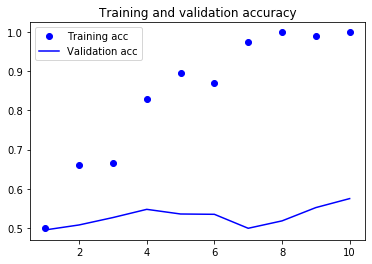

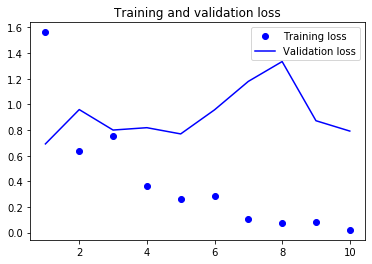

In [21]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

The model quickly starts overfitting, which is unsurprising given the small number of
training samples. Validation accuracy has high variance for the same reason, but it
seems to reach the high 50s.
 Note that your mileage may vary: because you have so few training samples, performance is heavily dependent on exactly which 200 samples you choose—and you’re
choosing them at random. If this works poorly for you, try choosing a different random set of 200 samples, for the sake of the exercise (in real life, you don’t get to
choose your training data).
 You can also train the same model without loading the pretrained word embeddings and without freezing the embedding layer. In that case, you’ll learn a taskspecific embedding of the input tokens, which is generally more powerful than
pretrained word embeddings when lots of data is available. But in this case, you have
only 200 training samples.

# Training the same model without pretrained word embeddings

In [22]:
# ab pretrained word embeding use nahe ker rahe
# apne bna rahe hai aur freeze bhe nahe ker rahe
# jese pichle example mai kia tha
# but data humne kam lia hai sirf 200 to performance ache nahe hoge 

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=maxlen))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 3s 13ms/sample - loss: 0.6897 - acc: 0.5150 - val_loss: 0.6941 - val_acc: 0.5205
Epoch 2/10
200/200 [==============================] - 2s 10

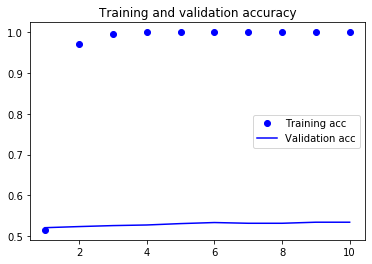

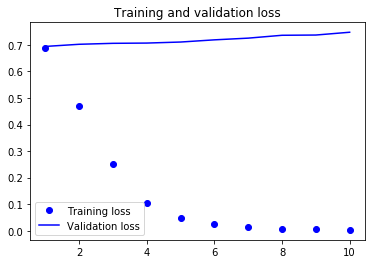

In [24]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Validation accuracy stalls in the low 50s. So in this case, pretrained word embeddings
outperform jointly learned embeddings. If you increase the number of training samples, this will quickly stop being the case—try it as an exercise.

 Finally, let’s evaluate the model on the test data. First, you need to tokenize the test
data.

# Tokenizing the data of the test set

In [25]:
# With this entire code we just created labels for the neg and pos text

import os
imdb_dir = 'aclImdb'
test_dir = os.path.join(imdb_dir, 'test') #test_dir = aclImdb\test
labels = []
texts = []
for label_type in ['neg', 'pos']:
    dir_name = os.path.join(test_dir, label_type) #dir_name = aclImdb\test\neg
                                                   #dir_name = aclImdb\test\pos
        
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':                  # if file is text file
            f = open(os.path.join(dir_name, fname),encoding="utf8") # open it
            texts.append(f.read())               # add in that empty texts list we made before
            f.close()
        if label_type == 'neg':                 # ager neg folder ka ho to 0 label
            labels.append(0)                    # aur labels list mai daldo jo upper bnaya tha
        else:
            labels.append(1)                   # pos hoto 1 label deke labels folder mai daldo

In [26]:
sequences = tokenizer.texts_to_sequences(texts) # number me convert kia
x_test = pad_sequences(sequences, maxlen=maxlen) # sentence ke max length set ke
y_test = np.asarray(labels) # labels ko array mai convert kia

Next, load and evaluate the first model.
pretrained Glove embeding wala

# Evaluating the model on the test set

In [27]:
model.load_weights('pre_trained_glove_model.h5')

evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

25000/1 - 4s - loss: 0.6767 - acc: 0.5726

Loss:  80.43322939109802 %
Accuracy:  57.256001234054565 %


You get an appalling test accuracy of 56%. Working with just a handful of training
samples is difficult!

# Wrapping up
Now you’re able to do the following:

 Turn raw text into something a neural network can process

 Use the Embedding layer in a Keras model to learn task-specific token embeddings

 Use pretrained word embeddings to get an extra boost on small naturallanguage-processing problems